<a href="https://colab.research.google.com/github/ZahraEk/OpenCV-Course/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import Required libraries :


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



---
**KNN :**

`cv2.createBackgroundSubtractorKNN` is a function in the OpenCV library that creates an instance of the K-Nearest Neighbors (KNN) background subtractor.  The algorithm works by comparing each pixel in the current frame with its K nearest neighbours in the background model, which is updated dynamically.

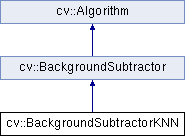

By modifying just five lines of code in our [MOG background subtraction](https://github.com/ZahraEk/OpenCV-Course/blob/main/mog.ipynb) script, we can use
a different background subtraction algorithm, different morphology parameters, and a
different video as input.
Just by replacing cv2.createBackgroundSubtractorMOG2 with
cv2.createBackgroundSubtractorKNN, we can we use a background subtractor based
on KNN clustering instead of MOG clustering:

`bg_subtractor = cv2.createBackgroundSubtractorKNN(detectShadows=True)`

Note that despite the change in algorithm, the detectShadows parameter is still
supported. Additionally, the apply method is still supported, so we do not need to change
anything related to the use of the background subtractor later in the script.

More details in :[📄OpenCV_Course.pdf](https://github.com/ZahraEk/OpenCV-Course/blob/main/OpenCV_Course.pdf) | pages 17-18

---




Frame 1 :



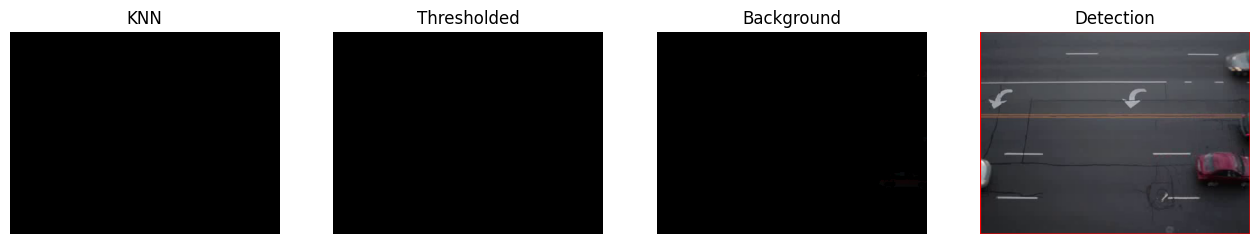


Frame 2 :



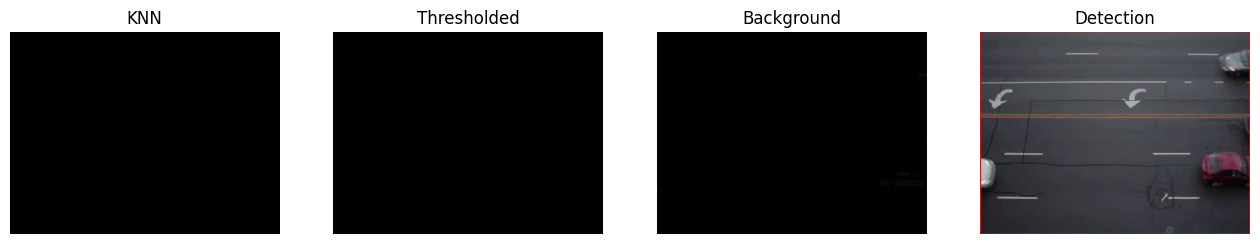


Frame 3 :



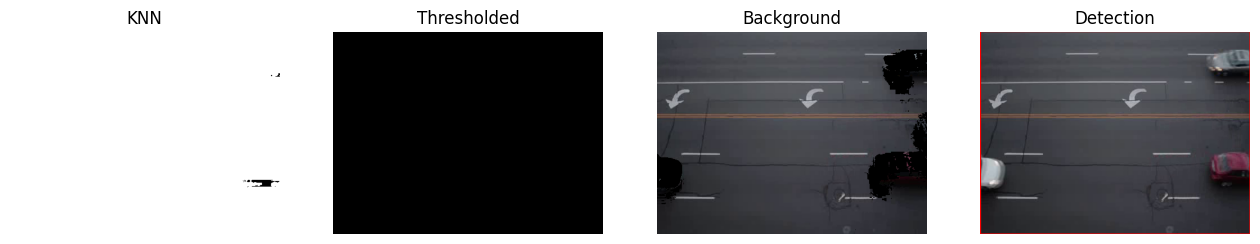


Frame 4 :



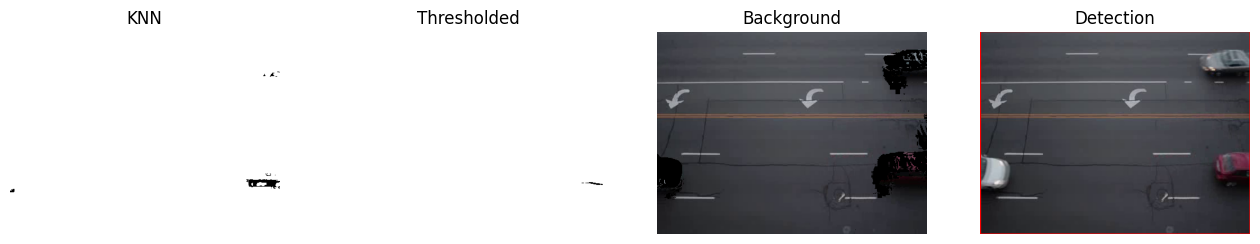


Frame 5 :



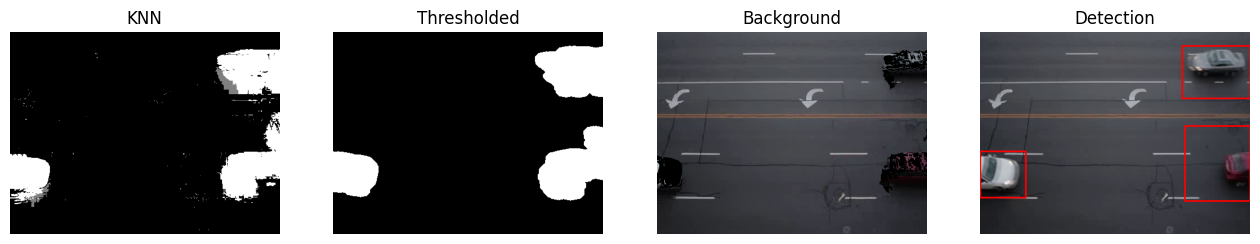


Frame 6 :



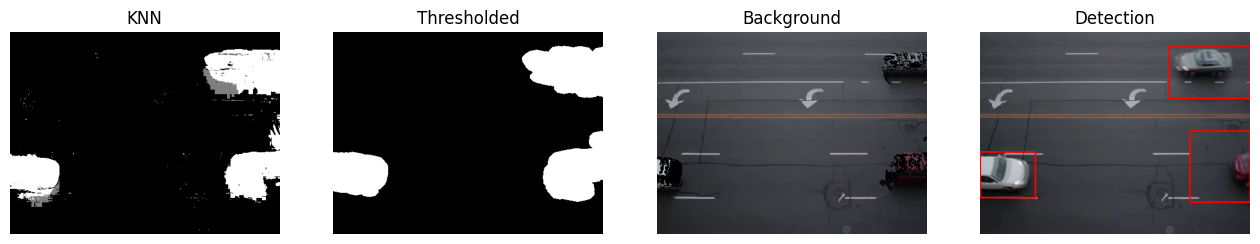


Frame 7 :



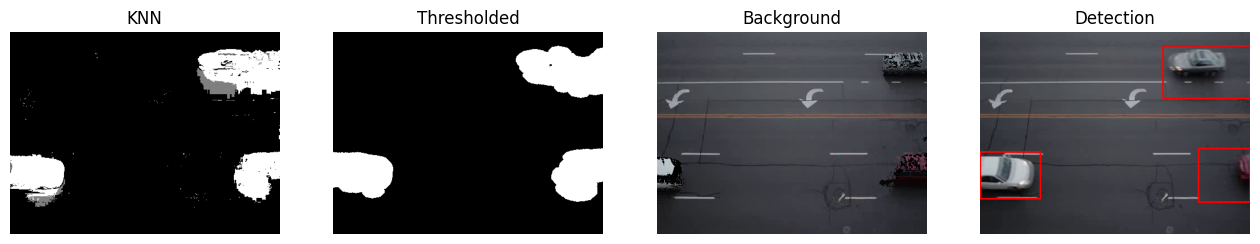


Frame 8 :



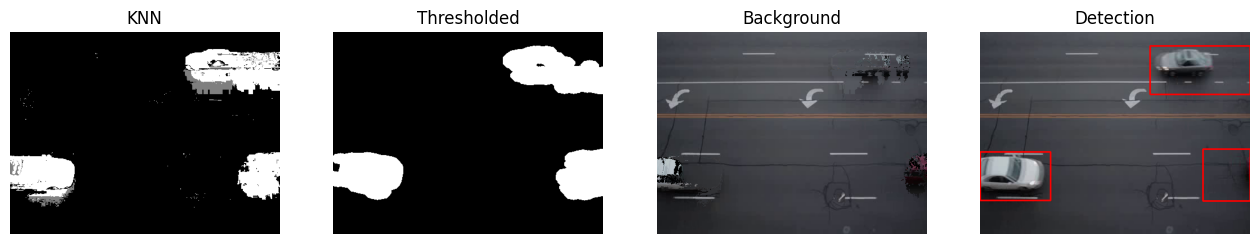


Frame 9 :



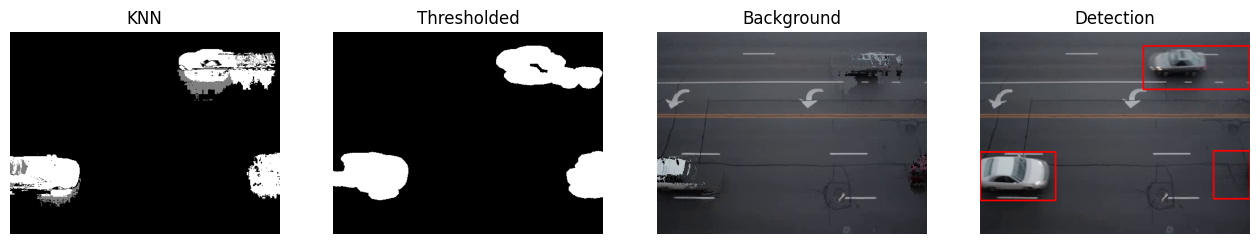


Frame 10 :



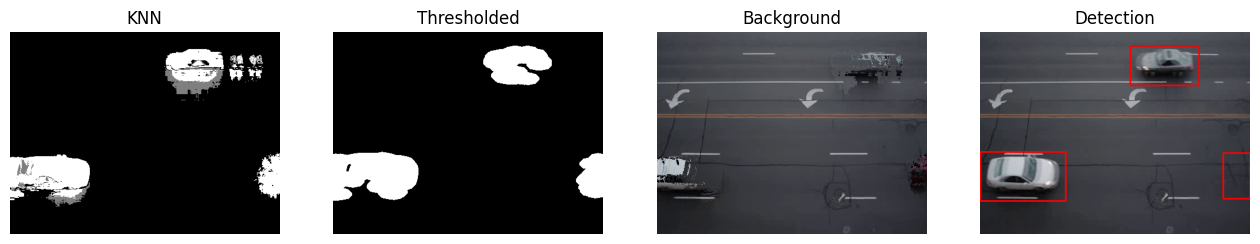

In [ ]:
# Create a background subtractor using the KNN method with shadow detection enabled.
bg_subtractor = cv2.createBackgroundSubtractorKNN(detectShadows=True)

# Define the kernel sizes for erosion and dilation
erode_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 5))
dilate_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (17, 11))

# Open the video file for reading
cap = cv2.VideoCapture("drive/MyDrive/traffic.flv")

# Get the total number of frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Skip the first 50 frames from the middle of the video (adjust as needed)
start_frame = max(total_frames // 2 + 50 , 0)

# Set the video capture to the start frame
cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

# Display 10 frames
for i in range(10):
    success, frame = cap.read()
    if not success:
        break

    # Apply background subtraction to get the foreground mask
    fg_mask = bg_subtractor.apply(frame)

    # Apply thresholding to create a binary image
    _, thresh = cv2.threshold(fg_mask, 244, 255, cv2.THRESH_BINARY)

    # Apply morphological erosion and dilation to smoothen the thresholded image
    cv2.erode(thresh, erode_kernel, thresh, iterations=2)
    cv2.dilate(thresh, dilate_kernel, thresh, iterations=2)

    # Find contours of objects in the thresholded image
    contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through detected contours and draw bounding rectangles for large ones
    for c in contours:
        if cv2.contourArea(c) > 1000:
            x, y, w, h = cv2.boundingRect(c)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)

    # Create a subplot for each image and display it
    print(f"\nFrame {i+1} :\n")
    f, subplt = plt.subplots(1,4, figsize=(16,12))

    subplt[0].imshow(fg_mask, cmap='gray')
    subplt[0].set_title('KNN')
    subplt[0].axis('off')

    subplt[1].imshow(thresh, cmap='gray')
    subplt[1].set_title('Thresholded')
    subplt[1].axis('off')

    subplt[2].imshow(cv2.cvtColor(bg_subtractor.getBackgroundImage(), cv2.COLOR_BGR2RGB))
    subplt[2].set_title('Background')
    subplt[2].axis('off')

    subplt[3].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    subplt[3].set_title('Detection')
    subplt[3].axis('off')

    plt.show()

# Release the video capture object and close OpenCV windows
cap.release()
cv2.destroyAllWindows()

> Result in video form : [knn_traffic.flv](https://drive.google.com/file/d/1-1w9pPQjHd3iYHol_oWWH_s6Mm39Ubt5/view?usp=sharing)